# COMPLETE CNN PROJECT – Fashion MNIST

In [1]:
# IMPORT LIBRARIES
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
# LOAD DATASET
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [3]:
# PROCESSING
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [4]:
# CLASS NAME FOR VISUALIZAION
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [5]:
# CNN MODEL
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


D:\ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# MODEL COMPILE
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
# MODEL TRAINING
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7818 - loss: 0.6055 - val_accuracy: 0.8507 - val_loss: 0.4006
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8526 - loss: 0.4093 - val_accuracy: 0.8736 - val_loss: 0.3396
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8708 - loss: 0.3558 - val_accuracy: 0.8853 - val_loss: 0.3100
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8829 - loss: 0.3247 - val_accuracy: 0.8910 - val_loss: 0.2944
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8895 - loss: 0.3063 - val_accuracy: 0.8971 - val_loss: 0.2786
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8949 - loss: 0.2841 - val_accuracy: 0.9024 - val_loss: 0.2697
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9003 - loss: 0.2718 - val_accuracy: 0.9045 - val_loss: 0.2615
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9047 - loss: 0.2590 - 

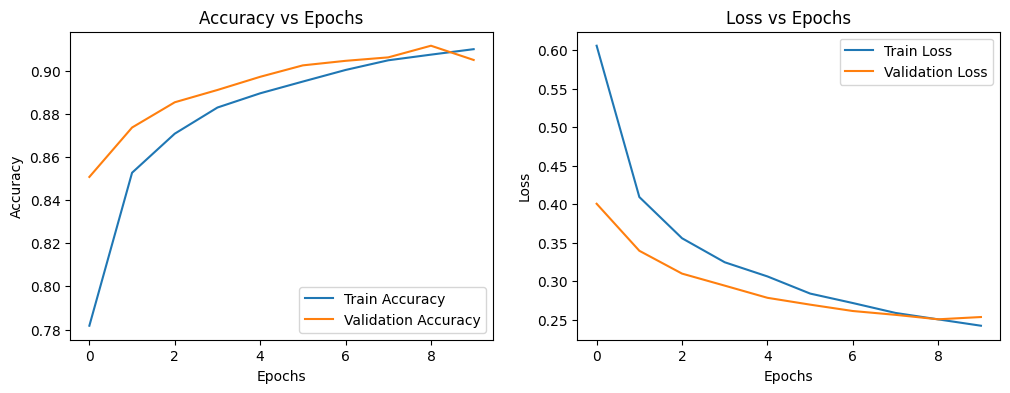

In [8]:
# ACCURACY AND LOSS GRAPH
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


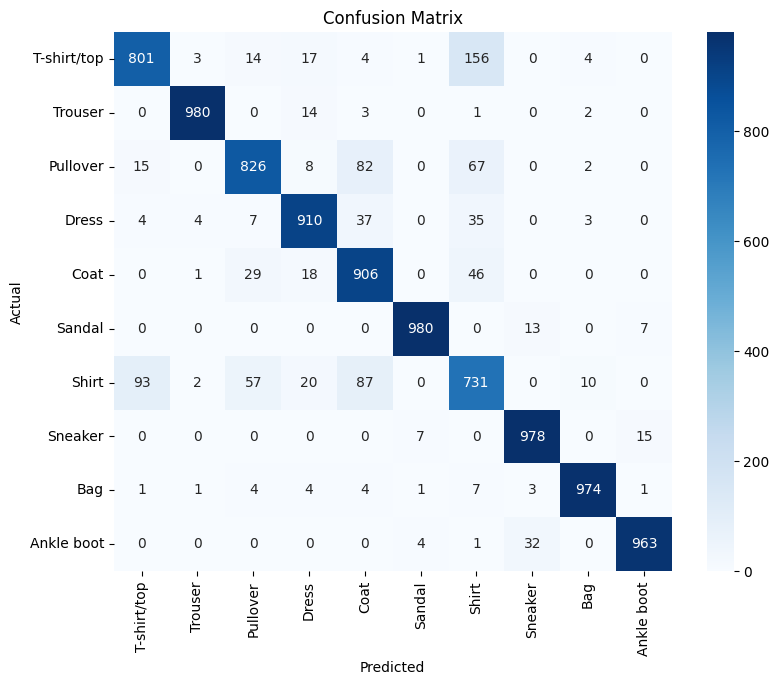

In [9]:
# CONFUSION MATRIX
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


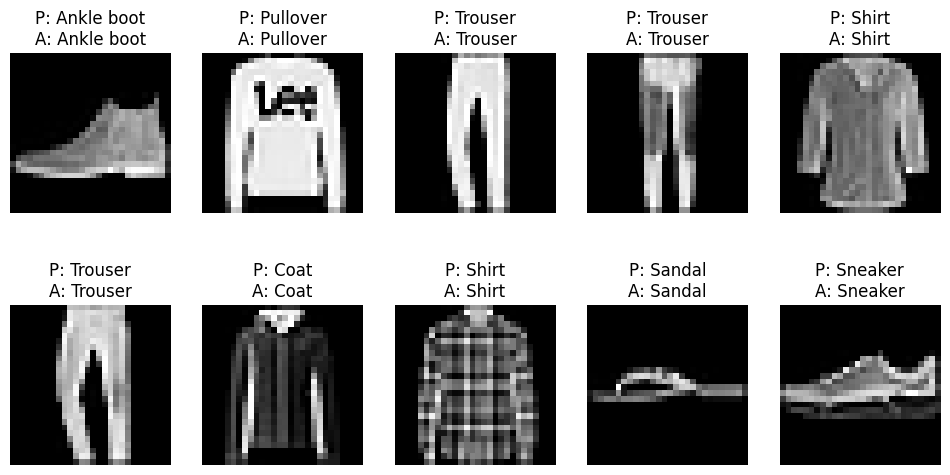

In [10]:
# Images + Prediction
plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    pred = class_names[y_pred_classes[i]]
    actual = class_names[y_true[i]]
    plt.title(f"P: {pred}\nA: {actual}")
    plt.axis('off')

plt.show()


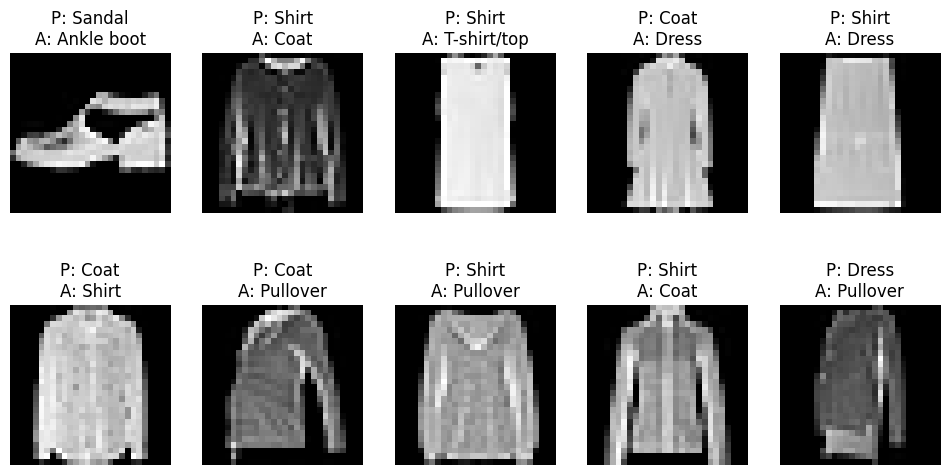

In [11]:
# Show Misclassified Images
wrong = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(wrong[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"P: {class_names[y_pred_classes[idx]]}\nA: {class_names[y_true[idx]]}")
    plt.axis('off')

plt.show()


## 1️⃣ Architecture Improvements (Most Important)

  Your current model has only 2 convolution blocks. Increase depth and stabilize training.

### 🔹 Improved CNN Architecture

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

# Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

D:\ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# MODEL COMPILE
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Why this helps:

- BatchNormalization → stabilizes gradients, faster convergence
- More Conv layers → better feature extraction
- Progressive Dropout → reduces overfitting
- Padding='same' → preserves spatial information

Expected accuracy: 92–94%
--- 
## 2️⃣ Data Augmentation (Very Effective)

Fashion items can appear slightly rotated or shifted. Use augmentation:

In [14]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1
# )

# datagen.fit(x_train)

# history = model.fit(
#     datagen.flow(x_train, y_train, batch_size=64),
#     epochs=20,
#     validation_data=(x_test, y_test)
# )

In [15]:
# Step 7: Prepare callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Save best model weights
checkpoint_path = "best_mnist_cnn.h5"

callbacks = [
    EarlyStopping(
        monitor='val_loss',       # Monitor validation loss
        patience=5,               # Agar 5 epochs tak improve nahi, stop
        restore_best_weights=True # Best weights restore karo
    ),
    ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        save_best_only=True       # Sirf best model save karo
    )
]


In [16]:
# Step 8: Train the CNN model
history = model.fit(
    x_train, y_train,
    epochs=20,              # Total training cycles
    batch_size=128,         # Number of images per batch
    validation_split=0.1,   # 10% of training data for validation
    callbacks=callbacks,    # EarlyStopping & ModelCheckpoint
    verbose=2               # Training progress ka output
)


Epoch 1/20


422/422 - 57s - 135ms/step - accuracy: 0.7447 - loss: 0.7146 - val_accuracy: 0.6985 - val_loss: 0.9682
Epoch 2/20


422/422 - 52s - 122ms/step - accuracy: 0.8409 - loss: 0.4335 - val_accuracy: 0.8733 - val_loss: 0.3355
Epoch 3/20


422/422 - 52s - 122ms/step - accuracy: 0.8673 - loss: 0.3609 - val_accuracy: 0.8947 - val_loss: 0.2737
Epoch 4/20


422/422 - 51s - 122ms/step - accuracy: 0.8819 - loss: 0.3262 - val_accuracy: 0.9002 - val_loss: 0.2639
Epoch 5/20


422/422 - 52s - 123ms/step - accuracy: 0.8912 - loss: 0.2969 - val_accuracy: 0.9118 - val_loss: 0.2366
Epoch 6/20
422/422 - 52s - 123ms/step - accuracy: 0.8989 - loss: 0.2806 - val_accuracy: 0.8995 - val_loss: 0.2788
Epoch 7/20
422/422 - 54s - 128ms/step - accuracy: 0.9020 - loss: 0.2690 - val_accuracy: 0.9078 - val_loss: 0.2516
Epoch 8/20


422/422 - 51s - 122ms/step - accuracy: 0.9059 - loss: 0.2559 - val_accuracy: 0.9192 - val_loss: 0.2222
Epoch 9/20
422/422 - 51s - 121ms/step - accuracy: 0.9092 - loss: 0.2481 - val_accuracy: 0.9152 - val_loss: 0.2354
Epoch 10/20


422/422 - 51s - 121ms/step - accuracy: 0.9145 - loss: 0.2369 - val_accuracy: 0.9235 - val_loss: 0.2080
Epoch 11/20
422/422 - 51s - 121ms/step - accuracy: 0.9164 - loss: 0.2303 - val_accuracy: 0.9182 - val_loss: 0.2284
Epoch 12/20


422/422 - 51s - 121ms/step - accuracy: 0.9177 - loss: 0.2259 - val_accuracy: 0.9282 - val_loss: 0.1979
Epoch 13/20


422/422 - 51s - 121ms/step - accuracy: 0.9223 - loss: 0.2141 - val_accuracy: 0.9312 - val_loss: 0.1916
Epoch 14/20
422/422 - 51s - 121ms/step - accuracy: 0.9238 - loss: 0.2127 - val_accuracy: 0.9253 - val_loss: 0.2105
Epoch 15/20
422/422 - 51s - 122ms/step - accuracy: 0.9232 - loss: 0.2106 - val_accuracy: 0.9285 - val_loss: 0.1949
Epoch 16/20
422/422 - 53s - 125ms/step - accuracy: 0.9268 - loss: 0.2004 - val_accuracy: 0.9325 - val_loss: 0.1931
Epoch 17/20


422/422 - 54s - 128ms/step - accuracy: 0.9271 - loss: 0.1979 - val_accuracy: 0.9338 - val_loss: 0.1890
Epoch 18/20
422/422 - 53s - 125ms/step - accuracy: 0.9315 - loss: 0.1922 - val_accuracy: 0.9343 - val_loss: 0.1975
Epoch 19/20


422/422 - 51s - 122ms/step - accuracy: 0.9309 - loss: 0.1910 - val_accuracy: 0.9367 - val_loss: 0.1873
Epoch 20/20
422/422 - 52s - 123ms/step - accuracy: 0.9324 - loss: 0.1856 - val_accuracy: 0.9293 - val_loss: 0.1917


In [17]:
# Step 9: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 3s - 9ms/step - accuracy: 0.9301 - loss: 0.2093
Test accuracy: 0.9301000237464905


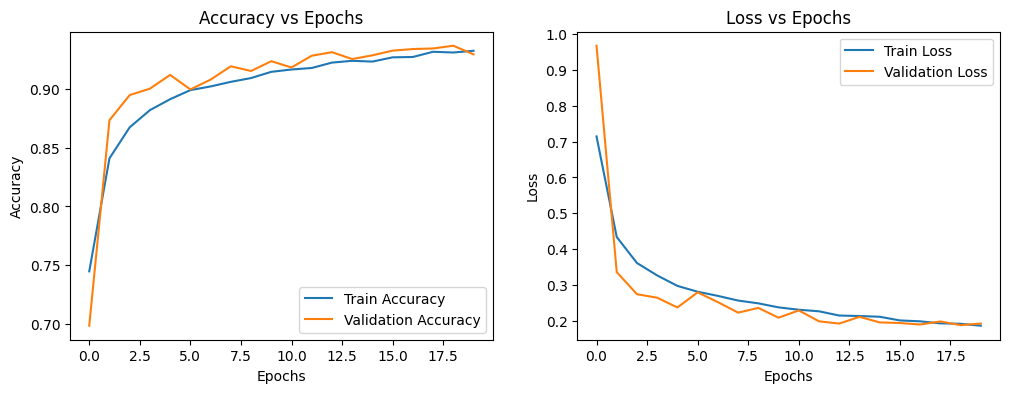

In [18]:
# ACCURACY AND LOSS GRAPH
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


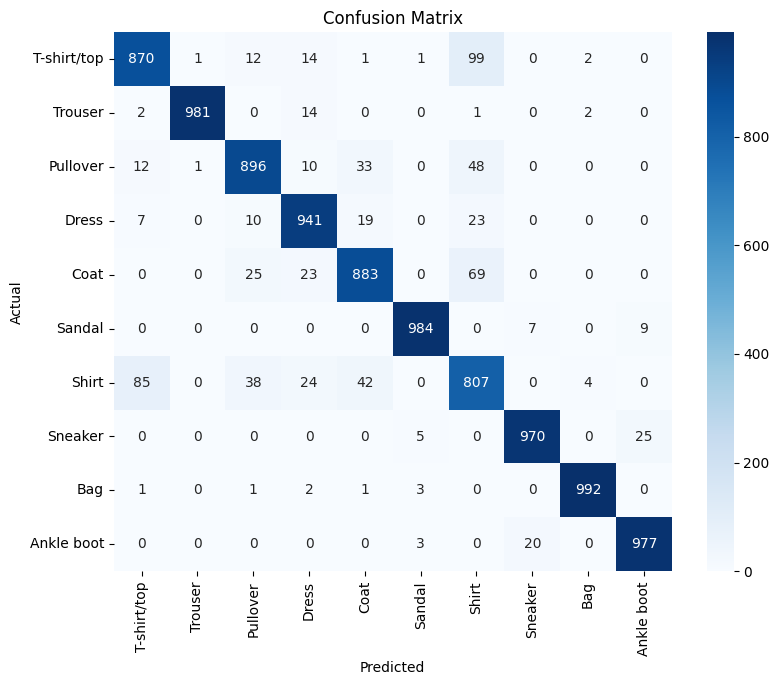

In [19]:
# CONFUSION MATRIX
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


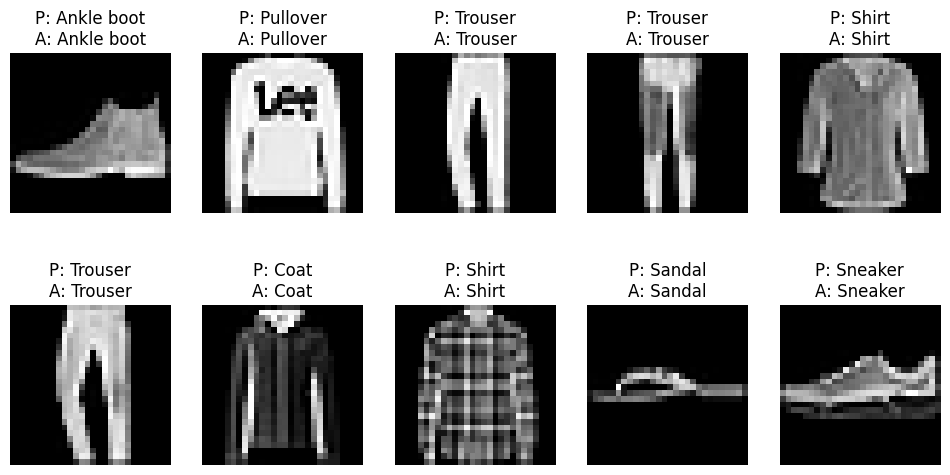

In [20]:
# Images + Prediction
plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    pred = class_names[y_pred_classes[i]]
    actual = class_names[y_true[i]]
    plt.title(f"P: {pred}\nA: {actual}")
    plt.axis('off')

plt.show()


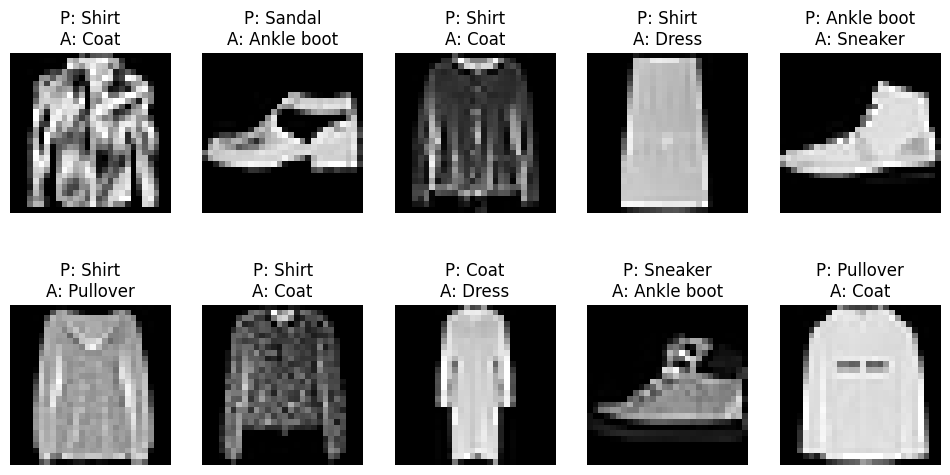

In [21]:
# Show Misclassified Images
wrong = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(wrong[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"P: {class_names[y_pred_classes[idx]]}\nA: {class_names[y_true[idx]]}")
    plt.axis('off')

plt.show()


In [23]:
# Save complete model
model.save("fashion_mnist_cnn.keras")

In [24]:
from tensorflow.keras.models import load_model

loaded_model = load_model("fashion_mnist_cnn.keras")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print("Loaded Model Accuracy:", test_acc)

D:\ML\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9301 - loss: 0.2093
Loaded Model Accuracy: 0.9301000237464905


In [25]:
model.save("fashion_mnist_cnn.h5")


In [26]:
import os
print(os.getcwd())

D:\ML\DEEP learning


In [27]:
print(os.listdir())

['.ipynb_checkpoints', 'ANN.ipynb', 'best_mnist_cnn.h5', 'CNN FASHION', 'fashion_mnist_cnn.h5', 'fashion_mnist_cnn.keras', 'Handwritten_Digit_Recognition_(MNIST_Dataset)_ANN.ipynb', 'Handwritten_Digit_Recognition_(MNIST_Dataset)_CNN.ipynb']
